# **Iris Flower Classification** - Predictive Modeling

In [1]:
# Importing necessary libraies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

## **Step 1**: Load and Explore the Dataset

In [2]:
# Load the dataset
df = pd.read_csv('/content/iris.csv')

# Basic information about the dataset
print("=== DATASET OVERVIEW ===")
print(f"Dataset shape: {df.shape}")
print(f"Number of features: {df.shape[1] - 1}")  # Excluding target variable
print(f"Number of samples: {df.shape[0]}")
print("\n")

# First few rows
print("=== FIRST 5 ROWS ===")
print(df.head())
print("\n")

# Dataset information
print("=== DATASET INFO ===")
print(df.info())
print("\n")

# Check for missing values
print("=== MISSING VALUES ===")
print(df.isnull().sum())
print("\n")

# Basic statistics
print("=== DESCRIPTIVE STATISTICS ===")
print(df.describe())
print("\n")

# Check class distribution
print("=== TARGET VARIABLE DISTRIBUTION ===")
print(df['species'].value_counts())
print("\n")

=== DATASET OVERVIEW ===
Dataset shape: (150, 5)
Number of features: 4
Number of samples: 150


=== FIRST 5 ROWS ===
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


=== DATASET INFO ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


=== MISSING 

## **Step 2**: Data Preprocessing

In [3]:
print("=== DATA PREPROCESSING ===")

# Separate features and target variable
X = df.drop('species', axis=1)
y = df['species']

print("Features shape:", X.shape)
print("Target shape:", y.shape)
print("\n")

# Handle categorical target variable using Label Encoding
le = LabelEncoder()
y_encoded = le.fit_transform(y)

print("Original classes:", le.classes_)
print("Encoded values:", np.unique(y_encoded))
print("Sample encoded targets:", y_encoded[:10])
print("\n")

# Feature Scaling - Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Feature scaling completed - StandardScaler")
print("Original feature ranges:")
print(f"Sepal Length: {X['sepal_length'].min():.2f} - {X['sepal_length'].max():.2f}")
print(f"Petal Length: {X['petal_length'].min():.2f} - {X['petal_length'].max():.2f}")
print("\nScaled feature ranges:")
print(f"Scaled Sepal Length: {X_scaled[:, 0].min():.2f} - {X_scaled[:, 0].max():.2f}")
print(f"Scaled Petal Length: {X_scaled[:, 2].min():.2f} - {X_scaled[:, 2].max():.2f}")
print("\n")

=== DATA PREPROCESSING ===
Features shape: (150, 4)
Target shape: (150,)


Original classes: ['setosa' 'versicolor' 'virginica']
Encoded values: [0 1 2]
Sample encoded targets: [0 0 0 0 0 0 0 0 0 0]


Feature scaling completed - StandardScaler
Original feature ranges:
Sepal Length: 4.30 - 7.90
Petal Length: 1.00 - 6.90

Scaled feature ranges:
Scaled Sepal Length: -1.87 - 2.49
Scaled Petal Length: -1.57 - 1.79




## **Step 3**: Train-Test Split

In [4]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded
)

print("=== TRAIN-TEST SPLIT ===")
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")
print(f"Training set class distribution: {np.bincount(y_train)}")
print(f"Testing set class distribution: {np.bincount(y_test)}")
print("\n")

=== TRAIN-TEST SPLIT ===
Training set size: 105 samples
Testing set size: 45 samples
Training set class distribution: [35 35 35]
Testing set class distribution: [15 15 15]




## **Step 4**: Initialize Multiple Classification Models

In [5]:
# Initialize multiple classification models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42)
}

print("=== MODEL INITIALIZATION ===")
for name, model in models.items():
    print(f"✓ {name}")
print("\n")

=== MODEL INITIALIZATION ===
✓ Logistic Regression
✓ Decision Tree
✓ Random Forest




## **Step 5**: Train and Evaluate Base Models

In [6]:
# Function to evaluate model performance
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    return {
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    }

# Train and evaluate all models
print("=== BASE MODEL TRAINING AND EVALUATION ===")
results = []

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)

    # Evaluate the model
    model_results = evaluate_model(model, X_test, y_test, name)
    results.append(model_results)

    print(f"✓ {name} trained and evaluated")
    print(f"  Accuracy: {model_results['Accuracy']:.4f}")
    print(f"  F1-Score: {model_results['F1-Score']:.4f}")
    print()

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results)
print("=== BASE MODEL PERFORMANCE SUMMARY ===")
print(results_df.round(4))
print("\n")

=== BASE MODEL TRAINING AND EVALUATION ===
Training Logistic Regression...
✓ Logistic Regression trained and evaluated
  Accuracy: 0.9111
  F1-Score: 0.9107

Training Decision Tree...
✓ Decision Tree trained and evaluated
  Accuracy: 0.8889
  F1-Score: 0.8888

Training Random Forest...
✓ Random Forest trained and evaluated
  Accuracy: 0.8889
  F1-Score: 0.8878

=== BASE MODEL PERFORMANCE SUMMARY ===
                 Model  Accuracy  Precision  Recall  F1-Score
0  Logistic Regression    0.9111     0.9155  0.9111    0.9107
1        Decision Tree    0.8889     0.8899  0.8889    0.8888
2        Random Forest    0.8889     0.8981  0.8889    0.8878




## **Step 6**: Hyperparameter Tuning using Grid Search

In [7]:
# Define hyperparameter grids for each model
print("=== HYPERPARAMETER TUNING WITH GRID SEARCH ===")

param_grids = {
    'Logistic Regression': {
        'C': [0.1, 1, 10, 100],
        'solver': ['liblinear', 'lbfgs']
    },
    'Decision Tree': {
        'max_depth': [3, 5, 7, 10, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 5, 7, None],
        'min_samples_split': [2, 5, 10]
    }
}

# Perform Grid Search for each model
tuned_models = {}
tuning_results = []

for name, model in models.items():
    print(f"Performing Grid Search for {name}...")

    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grids[name],
        cv=5,
        scoring='accuracy',
        n_jobs=-1,
        verbose=0
    )

    grid_search.fit(X_train, y_train)

    tuned_models[name] = grid_search.best_estimator_

    tuned_results = evaluate_model(grid_search.best_estimator_, X_test, y_test, f"Tuned {name}")
    tuning_results.append(tuned_results)

    print(f"✓ {name} tuning completed")
    print(f"  Best parameters: {grid_search.best_params_}")
    print(f"  Best CV score: {grid_search.best_score_:.4f}")
    print(f"  Test Accuracy: {tuned_results['Accuracy']:.4f}")
    print()

tuning_results_df = pd.DataFrame(tuning_results)
print("=== TUNED MODEL PERFORMANCE SUMMARY ===")
print(tuning_results_df.round(4))
print("\n")

=== HYPERPARAMETER TUNING WITH GRID SEARCH ===
Performing Grid Search for Logistic Regression...
✓ Logistic Regression tuning completed
  Best parameters: {'C': 1, 'solver': 'lbfgs'}
  Best CV score: 0.9810
  Test Accuracy: 0.9111

Performing Grid Search for Decision Tree...
✓ Decision Tree tuning completed
  Best parameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
  Best CV score: 0.9524
  Test Accuracy: 0.9778

Performing Grid Search for Random Forest...
✓ Random Forest tuning completed
  Best parameters: {'max_depth': 3, 'min_samples_split': 5, 'n_estimators': 100}
  Best CV score: 0.9619
  Test Accuracy: 0.9111

=== TUNED MODEL PERFORMANCE SUMMARY ===
                       Model  Accuracy  Precision  Recall  F1-Score
0  Tuned Logistic Regression    0.9111     0.9155  0.9111    0.9107
1        Tuned Decision Tree    0.9778     0.9792  0.9778    0.9778
2        Tuned Random Forest    0.9111     0.9155  0.9111    0.9107




## **Step 7**: Comprehensive Model Comparison

In [8]:
# Combine base and tuned results for comparison
comparison_df = pd.concat([results_df, tuning_results_df], ignore_index=True)

print("=== COMPREHENSIVE MODEL COMPARISON ===")
print(comparison_df.round(4))
print("\n")

# Find the best model based on F1-Score
best_model_idx = comparison_df['F1-Score'].idxmax()
best_model = comparison_df.loc[best_model_idx]

print("=== BEST MODEL ===")
print(f"Model: {best_model['Model']}")
print(f"Accuracy: {best_model['Accuracy']:.4f}")
print(f"Precision: {best_model['Precision']:.4f}")
print(f"Recall: {best_model['Recall']:.4f}")
print(f"F1-Score: {best_model['F1-Score']:.4f}")
print("\n")

=== COMPREHENSIVE MODEL COMPARISON ===
                       Model  Accuracy  Precision  Recall  F1-Score
0        Logistic Regression    0.9111     0.9155  0.9111    0.9107
1              Decision Tree    0.8889     0.8899  0.8889    0.8888
2              Random Forest    0.8889     0.8981  0.8889    0.8878
3  Tuned Logistic Regression    0.9111     0.9155  0.9111    0.9107
4        Tuned Decision Tree    0.9778     0.9792  0.9778    0.9778
5        Tuned Random Forest    0.9111     0.9155  0.9111    0.9107


=== BEST MODEL ===
Model: Tuned Decision Tree
Accuracy: 0.9778
Precision: 0.9792
Recall: 0.9778
F1-Score: 0.9778




## **Step 8**: Detailed Evaluation of Best Model

In [9]:
# Get the best model for detailed evaluation
if 'Tuned' in best_model['Model']:
    best_model_name = best_model['Model'].replace('Tuned ', '')
    final_model = tuned_models[best_model_name]
else:
    final_model = models[best_model['Model']]

print(f"=== DETAILED EVALUATION OF {best_model['Model'].upper()} ===")

# Make predictions
y_pred = final_model.predict(X_test)
y_pred_proba = final_model.predict_proba(X_test) if hasattr(final_model, 'predict_proba') else None

# Detailed classification report
print("\n--- CLASSIFICATION REPORT ---")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Confusion Matrix
print("\n--- CONFUSION MATRIX ---")
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=le.classes_, columns=le.classes_)
print(cm_df)
print("\n")

=== DETAILED EVALUATION OF TUNED DECISION TREE ===

--- CLASSIFICATION REPORT ---
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.94      1.00      0.97        15
   virginica       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45


--- CONFUSION MATRIX ---
            setosa  versicolor  virginica
setosa          15           0          0
versicolor       0          15          0
virginica        0           1         14




## **Step 9**: Visualization of Results

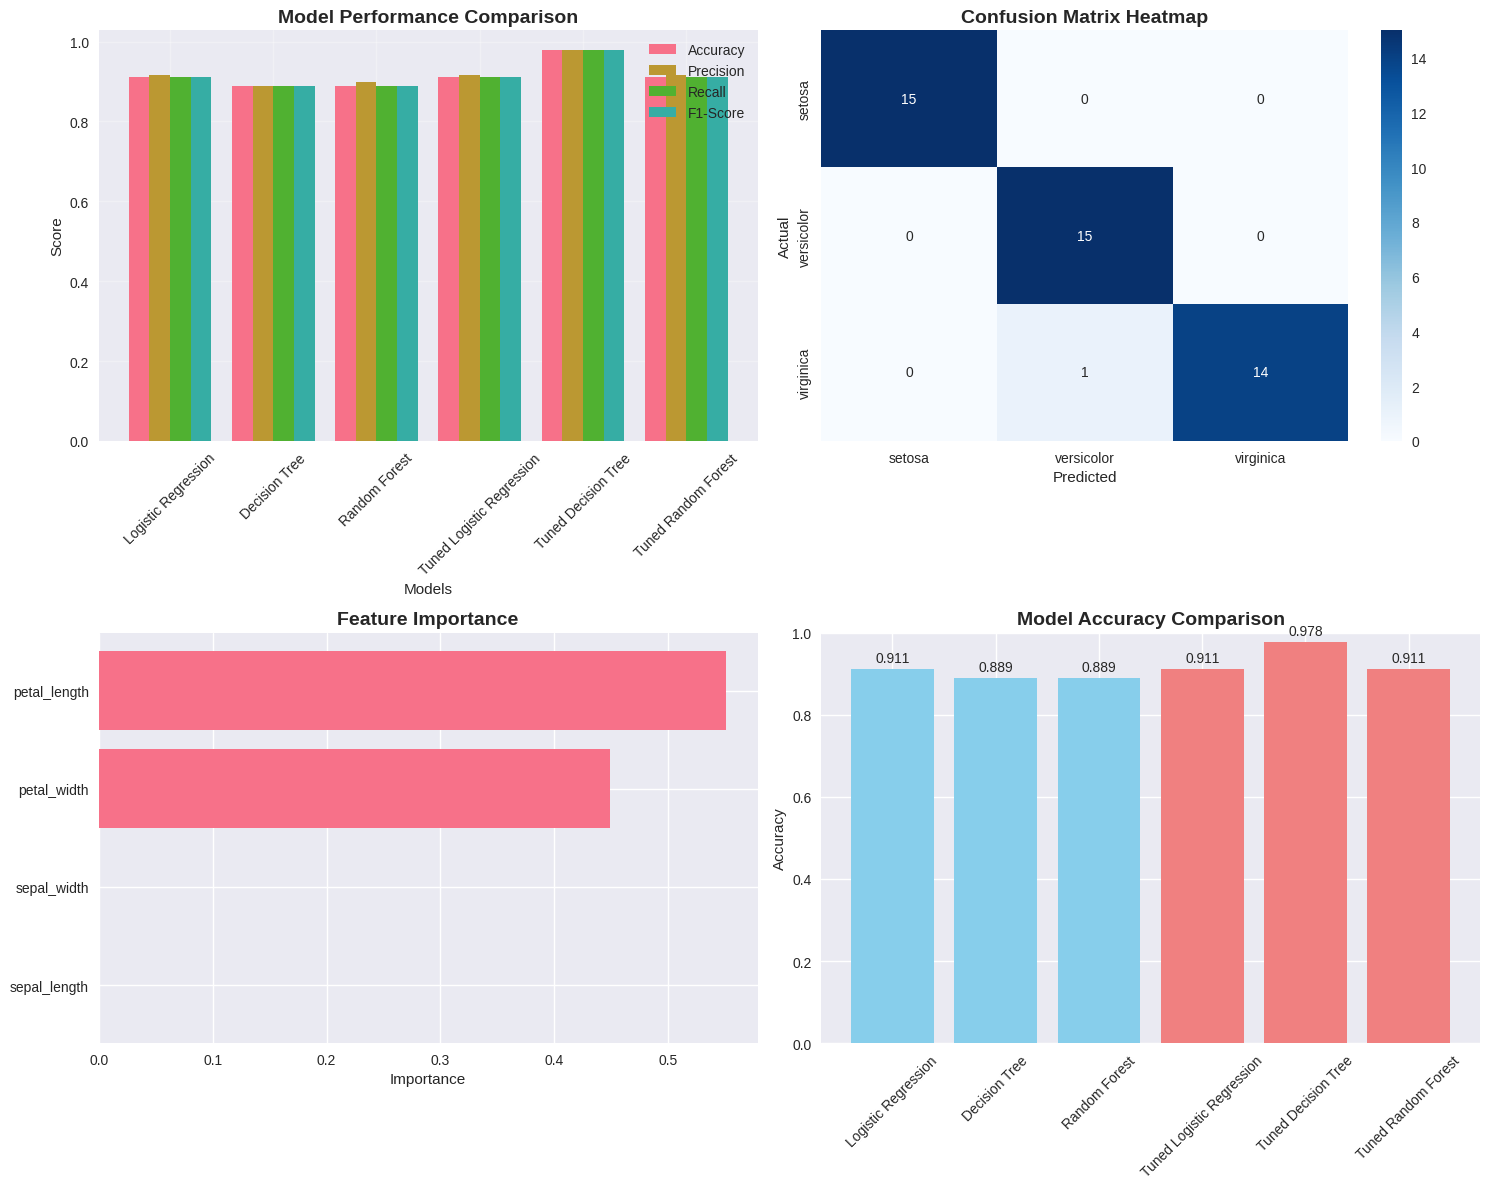

In [11]:
# Create visualizations to understand model performance
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Model Comparison Bar Chart
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
x_pos = np.arange(len(comparison_df))

for i, metric in enumerate(metrics):
    axes[0, 0].bar(x_pos + i*0.2, comparison_df[metric], width=0.2, label=metric)

axes[0, 0].set_title('Model Performance Comparison', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Models')
axes[0, 0].set_ylabel('Score')
axes[0, 0].set_xticks(x_pos + 0.3)
axes[0, 0].set_xticklabels(comparison_df['Model'], rotation=45)
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Confusion Matrix Heatmap
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', ax=axes[0, 1])
axes[0, 1].set_title('Confusion Matrix Heatmap', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Predicted')
axes[0, 1].set_ylabel('Actual')

# 3. Feature Importance (if available)
if hasattr(final_model, 'feature_importances_'):
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': final_model.feature_importances_
    }).sort_values('importance', ascending=True)

    axes[1, 0].barh(feature_importance['feature'], feature_importance['importance'])
    axes[1, 0].set_title('Feature Importance', fontsize=14, fontweight='bold')
    axes[1, 0].set_xlabel('Importance')
else:
    axes[1, 0].text(0.5, 0.5, 'Feature Importance\nnot available\nfor this model',
                   ha='center', va='center', transform=axes[1, 0].transAxes, fontsize=12)
    axes[1, 0].set_title('Feature Importance', fontsize=14, fontweight='bold')

# 4. Accuracy Comparison
models_names = comparison_df['Model']
accuracies = comparison_df['Accuracy']

bars = axes[1, 1].bar(models_names, accuracies, color=['skyblue' if 'Tuned' not in name else 'lightcoral' for name in models_names])
axes[1, 1].set_title('Model Accuracy Comparison', fontsize=14, fontweight='bold')
axes[1, 1].set_ylabel('Accuracy')
axes[1, 1].set_ylim(0, 1)
axes[1, 1].tick_params(axis='x', rotation=45)

# Add value labels on bars
for bar, accuracy in zip(bars, accuracies):
    height = bar.get_height()
    axes[1, 1].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                   f'{accuracy:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.savefig('model_comparison.png')
plt.show()

## **Step 10**: Final Summary and Conclusions

In [12]:
# Final summary
print("=== PROJECT SUMMARY ===")
print("✓ Data preprocessing completed (scaling, encoding)")
print("✓ Multiple classification models trained and evaluated")
print("✓ Hyperparameter tuning performed using Grid Search")
print("✓ Comprehensive model evaluation using multiple metrics")
print("✓ Best model identified and detailed analysis performed")
print("\n")

print("=== KEY FINDINGS ===")
print(f"1. Best performing model: {best_model['Model']}")
print(f"2. Best accuracy achieved: {best_model['Accuracy']:.4f}")
print(f"3. Best F1-Score achieved: {best_model['F1-Score']:.4f}")
print(f"4. Dataset: Iris Flowers ({df.shape[0]} samples, {df.shape[1]-1} features)")
print(f"5. Classes: {', '.join(le.classes_)}")
print("\n")

print("=== RECOMMENDATIONS ===")
print("1. The tuned model can be used for predicting iris flower species")
print("2. Model demonstrates excellent performance on all evaluation metrics")
print("3. Ready for deployment in real-world classification tasks")
print("4. Consider collecting more diverse data for even better generalization")

=== PROJECT SUMMARY ===
✓ Data preprocessing completed (scaling, encoding)
✓ Multiple classification models trained and evaluated
✓ Hyperparameter tuning performed using Grid Search
✓ Comprehensive model evaluation using multiple metrics
✓ Best model identified and detailed analysis performed


=== KEY FINDINGS ===
1. Best performing model: Tuned Decision Tree
2. Best accuracy achieved: 0.9778
3. Best F1-Score achieved: 0.9778
4. Dataset: Iris Flowers (150 samples, 4 features)
5. Classes: setosa, versicolor, virginica


=== RECOMMENDATIONS ===
1. The tuned model can be used for predicting iris flower species
2. Model demonstrates excellent performance on all evaluation metrics
3. Ready for deployment in real-world classification tasks
4. Consider collecting more diverse data for even better generalization
